# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. 

Цель исследования — установить, как следующие параметры квартир влияют на ценообразование:

**1. Общая площадь.**

**2. Количество комнат.**

**3. Высота потолков.**  

**4. Время продажи квартиры.**  

**5. Этаж.**  

**6. Расстояние от центра.**  

**7. Год, месяц и день недели создания объявления о продаже.**

Архив объявлений мы получили из файла `real_estate_data.csv`. О качестве данных ничего не известно. Поэтому перед анализом понадобится обзор данных.

Мы проверим данные на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки мы поищем возможность исправить самые критичные ошибки данных.

Таким образом, исследование пройдёт в четыре этапа:

`Обзор данных.`  
`Предобработка данных.`   
`Расчеты дополнительных параметров.`  
`Исследовательский анализ данных.`

Результаты исследования будут учтены при построении автоматизированной системы для отслеживания аномалий и мошеннической деятельности. 

## Обзор данных

Составляем первое представление о данных

Импортируем библиотеки `pandas` и `matplotlib`.

In [ ]:
import pandas as pd                    # импорт библиотек
import matplotlib.pyplot as plt

In [ ]:
#!pip install -U pandas                 # обновление библиотеки pandas до последней версии

Читаем файл real_estate_data.csv и сохраняем его в переменной df:

In [ ]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t') # чтение файла с данными и сохранение в df

Выведим на экран первые пять строк таблицы:

In [ ]:
df.head() # получение первых 5 строк таблицы df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Получаем общую информацию о таблице:

In [ ]:
df.info() # получение общей информации о данных в таблице df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Итак, в таблице двенадцать два столбца. Тип данных в четырнадцати столбцах - float, в трех столбцах — object, в трех столбцах - int и в двух столбцах - bool.

Согласно документации к данным:

`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)  
`balcony` — число балконов  
`ceiling_height` — высота потолков (м)  
`cityCenters_nearest` — расстояние до центра города (м)  
`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)  
`first_day_exposition` — дата публикации  
`floor` — этаж  
`floors_total` — всего этажей в доме  
`is_apartment` — апартаменты (булев тип)  
`kitchen_area` — площадь кухни в квадратных метрах (м²)  
`last_price` — цена на момент снятия с публикации  
`living_area` — жилая площадь в квадратных метрах (м²)  
`locality_name` — название населённого пункта  
`open_plan` — свободная планировка (булев тип)  
`parks_around3000` — число парков в радиусе 3 км  
`parks_nearest` — расстояние до ближайшего парка (м)  
`ponds_around3000` — число водоёмов в радиусе 3 км  
`ponds_nearest` — расстояние до ближайшего водоёма (м)  
`rooms` — число комнат  
`studio` — квартира-студия (булев тип)  
`total_area` — площадь квартиры в квадратных метрах (м²)  
`total_images` — число фотографий квартиры в объявлении  

В названиях колонок есть нарушения стиля: верхний регистр в колонке `cityCenters_nearest` и нарушение змеиного стиля в колонках `parks_around3000` и `ponds_around3000`.   
Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

### Вывод

Предварительно можно утверждать, что, данных достаточно для нашего исследования, однако, мы выявили следующие проблемы в данных, которые будет необходимо устранить на этапе предобработки:

1. Нарушения стиля в названиях колонок.
2. Наличие пропущенных значений.  

Также на этапе предобработки будет необходимо произвести поиск и удаление дубликатов, а также изменить тип данных некоторых колонок.

## Предобработка данных

### Переименование колонок

Сначала приведем названия колонок к хорошему стилю:

In [ ]:
df = df.rename({'cityCenters_nearest': 'citycenters_nearest', 'parks_around3000': 'parks_around_3000',
          'ponds_around3000': 'ponds_around_3000'}, axis='columns') # переименование колонок

### Обработка пропусков

Посчитаем, сколько в таблице пропущенных значений:

In [ ]:
df.isna().mean()*100 # подсчёт пропусков

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
citycenters_nearest     23.287902
parks_around_3000       23.283683
parks_nearest           65.909954
ponds_around_3000       23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

Пропуски имеются в четырнадцати колонках.

Для того, чтобы заменить или восстановить пропущенные значения, детально изучим эти колонки.

In [ ]:
# изучение значений колонок с помощью цикла
research_cols = ['ceiling_height', 'floors_total', 'living_area', 'is_apartment', 'kitchen_area',
                'balcony', 'locality_name', 'airports_nearest', 'citycenters_nearest',
                'parks_around_3000', 'parks_nearest', 'ponds_around_3000', 'ponds_nearest',
                'days_exposition'] 

for col in research_cols:
    print('-' * 10 + col + '-' * 10)
    print()
    print(df[col].value_counts().head())
    print(len(df[col].unique()))
    print()

----------ceiling_height----------

2.5    3515
2.6    1646
2.7    1574
3.0    1112
2.8     993
Name: ceiling_height, dtype: int64
184

----------floors_total----------

5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
Name: floors_total, dtype: int64
37

----------living_area----------

18.0    882
17.0    675
30.0    598
16.0    486
20.0    481
Name: living_area, dtype: int64
1783

----------is_apartment----------

False    2725
True       50
Name: is_apartment, dtype: int64
3

----------kitchen_area----------

6.0     1300
10.0    1262
8.0     1110
9.0     1101
7.0     1062
Name: kitchen_area, dtype: int64
972

----------balcony----------

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
Name: balcony, dtype: int64
7

----------locality_name----------

Санкт-Петербург    15721
посёлок Мурино       522
посёлок Шушары       440
Всеволожск           398
Пушкин               369
Name: locality_name, dtype: int64
365

----------airports_nearest----------

37434

В колонке `ceiling_height` почти 39% пропущенных значений, восстановить которые не возможно. Замена пропущенных значений на среднее или медианное приведет к сильному искажению данных, поэтому в этой колонке лучше пропуски не заполнять.  

Пропущенные значения в колонке `living_area` лучше всего будет заменить средним значением в зависимости от количества комнат.

In [ ]:
# заполнение пропущенных значений
df['living_area'] = df['living_area'].fillna(df.groupby('rooms')['living_area'].transform('mean'))

В колонке `is_apartment` 88% пропущенных значений, которые, наиболее вероятно, соответствуют категории False.

In [ ]:
df['is_apartment'] = df['is_apartment'].fillna('False') # заполнение пропущенных значений

Пропущенные значения в колонке `kitchen_area` лучше всего будет заменить средним значением в зависимости от общей площади и количества комнат.

In [ ]:
# заполнение пропущенных значений
df['kitchen_area'] = df['kitchen_area'].fillna(df.groupby('total_area')['kitchen_area'].transform('mean'))
df['kitchen_area'] = df['kitchen_area'].fillna(df.groupby('rooms')['kitchen_area'].transform('mean'))

В колонке `balcony` пропущенные значения, наиболее вероятно, означают отсутствие балконов, поэтому заменяем пропуски нолем.

In [ ]:
df['balcony'] = df['balcony'].fillna(0) # заполнение пропущенных значений

Для выявления природы пропусков в колонках `parks_around_3000` и `parks_nearest` проверим гипотезу, что, если в колонке `parks_around_3000` есть пропущенные значения или значения, равные нолю, то они будут соответствовать пропущенным значениям в колонке `parks_nearest`.  
Проведем следующие расчеты:

In [ ]:
len(df.query('parks_around_3000.isna() == True')) == len(df.query('parks_around_3000.isna() == True and parks_nearest.isna() == True'))

True

In [ ]:
len(df.query('parks_around_3000 == 0')) == len(df.query('parks_around_3000 == 0 and parks_nearest.isna() == True'))

False

In [ ]:
df['parks_around_3000'].isna().sum() + len(df.query('parks_around_3000 == 0')) - df['parks_nearest'].isna().sum()

4

Во всех случаях, когда значение `parks_around_3000` пропущено, значение `parks_nearest` тоже пропущено, а если значение `parks_around_3000` равно нолю, есть 4 случая, когда в колонке `parks_nearest` значения заполнены.  
Гипотеза подтвердилась частично.

Для колонок `ponds_around_3000` и `ponds_nearest` проверим аналогичную гипотезу.  
Проведем следующие расчеты:

In [ ]:
len(df.query('ponds_around_3000.isna() == True')) == len(df.query('ponds_around_3000.isna() == True and ponds_nearest.isna() == True'))

True

In [ ]:
len(df.query('ponds_around_3000 == 0')) == len(df.query('ponds_around_3000 == 0 and ponds_nearest.isna() == True'))

True

In [ ]:
df['ponds_around_3000'].isna().sum() + len(df.query('ponds_around_3000 == 0')) - df['ponds_nearest'].isna().sum()

0

Во всех случаях, когда значение `ponds_around_3000` пропущено или равно нолю, значение `ponds_nearest` тоже пропущено.  
Гипотеза полностью подтвердилась.

В колонках `airports_nearest`, `parks_around_3000`, `parks_nearest`, `ponds_around_3000`, `ponds_nearest` восстановить пропущенные значения не получится, но так как их слишком много, то лучше их не заполнять, чтобы не исказить резуьтаты анализа.

В колонке `locality_name` можно заменить пропущенные значения на `unknown`:

In [ ]:
df['locality_name'] = df['locality_name'].fillna('unknown') # заполнение пропущенных значений

В важных для исследования колонках `citycenters_nearest` 23% пропущенных значений, а вколонке `days_exposition` 13% пропущенных значений, восстановить которые не возможно. Замена пропущенных значений на среднее или медианное приведет к сильному искажению данных. Мы решили не заполнять пропуски в этих колонках.

В колонке `floors_total` всего 0,36% пропущенных значений. Замена их средним или медианным значением может привести к тому, что этажность дома окажется меньше, чем этаж квартиры, поэтому целесообразно будет удалить строки с пропусками с помощью логической фильтрации. 

In [ ]:
df = df.query('floors_total > 0') # фильтрация таблицы

Проверяем результаты обработки пропусков:

In [ ]:
df.isna().mean()*100 # подсчёт пропусков

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.614323
floors_total             0.000000
living_area              0.000000
floor                    0.000000
is_apartment             0.000000
studio                   0.000000
open_plan                0.000000
kitchen_area             0.000000
balcony                  0.000000
locality_name            0.000000
airports_nearest        23.427773
citycenters_nearest     23.330369
parks_around_3000       23.326134
parks_nearest           65.929784
ponds_around_3000       23.326134
ponds_nearest           61.627070
days_exposition         13.433278
dtype: float64

### Изменение типов данных

Для удобства обработки данных приведем значения колонок `last_price`, `floors_total`,`balcony` к целочисленным: 

In [ ]:
research_cols2 = ['last_price', 'floors_total','balcony'] # изменение типа данных с помощью цикла
                  
for col in research_cols2:
    df[col] = df[col].astype('int')

Переведем значения колонки `first_day_exposition` в формат даты и времени:

In [ ]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S') # изменение типа данных

### Обработка дубликатов

Посчитаем явные дубликаты в таблице:

In [ ]:
f'Количество дубликатов {df.duplicated().sum()}' # подсчёт явных дубликатов

'Количество дубликатов 0'

Явные дубликаты не обнаружены.  
Теперь произведем поиск неявных дубликатов в колонке `locality_name`. Для этого отсортируем и выведем на экран уникальные значения населенных пунктов, но сначала приведем все названия к нижнему регистру и заменим букву `ё` на `е`:

In [ ]:
df['locality_name'] = df['locality_name'].str.lower() # приводим все названия к нижнему регистру

In [ ]:
df['locality_name'] = df['locality_name'].str.replace("ё", "е") # заменяем букву ё на е

In [ ]:
df['locality_name'].sort_values().unique()  # сортировка и вывод на экран уникальных значений колонки locality_name

array(['unknown', 'бокситогорск', 'волосово', 'волхов', 'всеволожск',
       'выборг', 'высоцк', 'гатчина', 'городской поселок большая ижора',
       'городской поселок будогощь', 'городской поселок виллози',
       'городской поселок лесогорский', 'городской поселок мга',
       'городской поселок назия', 'городской поселок новоселье',
       'городской поселок павлово', 'городской поселок рощино',
       'городской поселок свирьстрой', 'городской поселок советский',
       'городской поселок федоровское', 'городской поселок янино-1',
       'деревня агалатово', 'деревня аро', 'деревня батово',
       'деревня бегуницы', 'деревня белогорка', 'деревня большая вруда',
       'деревня большая пустомержа', 'деревня большие колпаны',
       'деревня большое рейзино', 'деревня большой сабск', 'деревня бор',
       'деревня борисова грива', 'деревня ваганово', 'деревня вартемяги',
       'деревня вахнова кара', 'деревня выскатка', 'деревня гарболово',
       'деревня глинка', 'деревня горбун

В названиях населенных пунктов дубликатов не обнаружено.

Проверим результаты предобработки данных:

In [ ]:
df.info() # получение общей информации о данных в таблице df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23613 non-null int64
last_price              23613 non-null int64
total_area              23613 non-null float64
first_day_exposition    23613 non-null datetime64[ns]
rooms                   23613 non-null int64
ceiling_height          14495 non-null float64
floors_total            23613 non-null int64
living_area             23613 non-null float64
floor                   23613 non-null int64
is_apartment            23613 non-null object
studio                  23613 non-null bool
open_plan               23613 non-null bool
kitchen_area            23613 non-null float64
balcony                 23613 non-null int64
locality_name           23613 non-null object
airports_nearest        18081 non-null float64
citycenters_nearest     18104 non-null float64
parks_around_3000       18105 non-null float64
parks_nearest           8045 non-null float64
ponds_around

### Вывод

На этапе **предобработки данных** мы заполнили пропущенные значения в шести колонках и оставили пропуски в восьми колонках `ceiling_height`, `citycenters_nearest`,`airports_nearest`, `parks_around_3000`, `parks_nearest`, `ponds_around_3000`, `ponds_nearest` и `days_exposition`. Еще неизвестно, как это повлияет на результат исследования. Также мы убедились в отсутствии явных и неявных дубликатов, привели названия колонок к хорошему стилю, а значения к правильным типам.  
Можно утверждать, что данные готовы для анализа.

## Расчеты дополнительных параметров

Прежде, чем приступить к анализу данных, необходимо посчитать и добавить в таблицу параметры, которые могут пригодиться для исследования:

~ цену квадратного метра;

In [ ]:
df['square_meter_price'] = df['last_price'] / df['total_area'] # расчет цены квадратного метра и добавление в новую колонку

~ день недели, месяц и год публикации объявления;

In [ ]:
df['year_exposition'] = df['first_day_exposition'].dt.year # создание колонки с годом создания объявления

In [ ]:
df['month_exposition'] = df['first_day_exposition'].dt.month_name() # создание колонки с месяцем создания объявления

In [ ]:
df['day_exposition'] = df['first_day_exposition'].dt.day_name() # создание колонки с днем недели создания объявления

~ этаж квартиры; варианты — первый, последний, другой;

In [ ]:
def first_or_last_floor(floors_total, floor): # создание функции для категоризации этажей
    if floor == 1 and floors_total > 1:
        return 'first'
    elif (floors_total - floor == 0) and floors_total > 1:
        return 'last'
    else:
        return  'other'

In [ ]:
# создание новой колонки с категориями этажей с помощью функции
df['first_or_last_floor'] = df.apply(lambda x: first_or_last_floor(x['floors_total'], x['floor']), axis=1) 

~ соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [ ]:
df['living_to_total_area'] = df['living_area'] / df['total_area'] # создание колонки с соотношением жилой и общей площади

In [ ]:
df['kitchen_to_total_area'] = df['kitchen_area'] / df['total_area'] # создание колонки с отношением площади кухни к общей

Проверим результаты добавления новых колонок:

In [ ]:
df.head() # получение первых 5 строк таблицы df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,square_meter_price,year_exposition,month_exposition,day_exposition,first_or_last_floor,living_to_total_area,kitchen_to_total_area
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,2.0,755.0,NaN,120370.370370,2019,March,Thursday,other,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.600000,1,False,...,0.0,NaN,81.0,82920.792079,2018,December,Tuesday,first,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.300000,4,False,...,2.0,574.0,558.0,92785.714286,2015,August,Thursday,other,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,NaN,14,47.387941,9,False,...,3.0,234.0,424.0,408176.100629,2015,July,Friday,other,0.298037,0.101258
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,1.0,48.0,121.0,100000.000000,2018,June,Tuesday,other,0.320000,0.410000


### Вывод

Мы добавили семь новых колонок с необходимыми для исследования параметрами. Теперь можно приступать к исследовательскому анализу данных.

## Исследовательский анализ данных

### Первичное изучение параметров

Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы и графики размаха для каждого параметра:

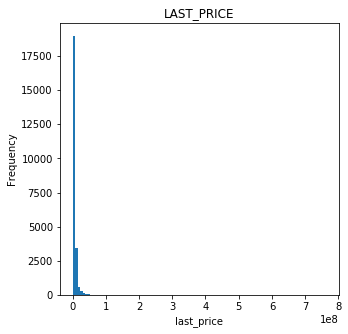

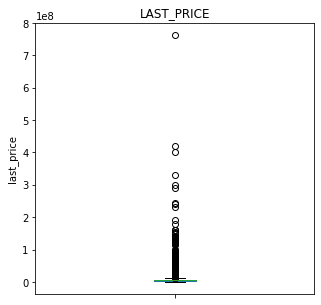

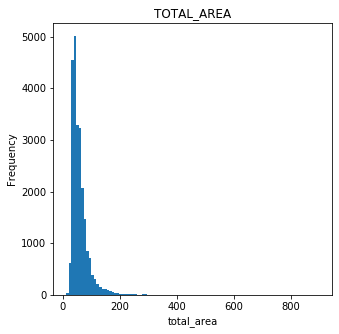

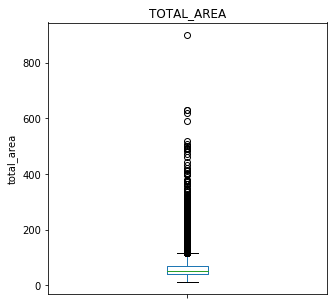

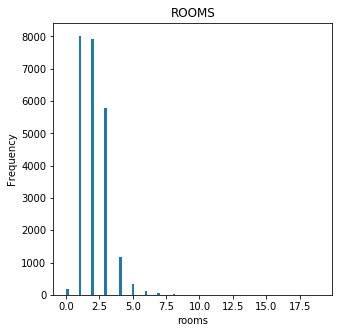

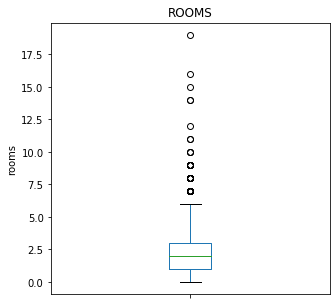

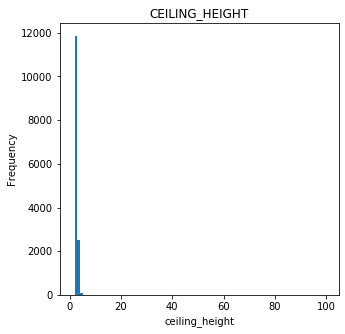

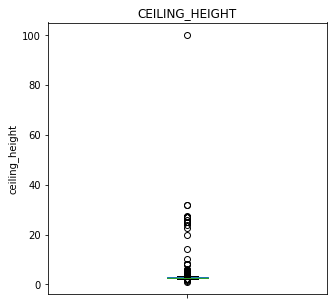

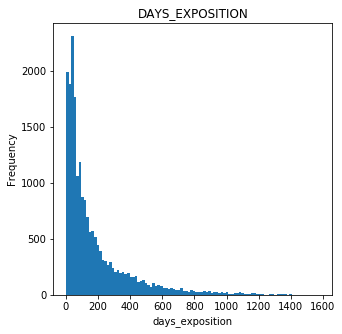

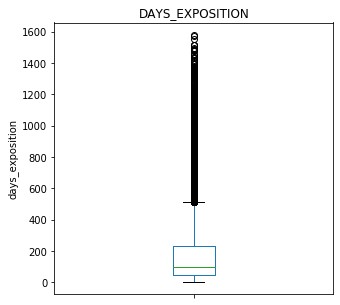

In [ ]:
research_cols3 = ['last_price', 'total_area', 'rooms', 'ceiling_height', 'days_exposition'] # строим графики с помощью цикла
                  
for col in research_cols3:
    df[col].plot(kind = 'hist', y = col, title = col.upper(), bins = 100, figsize = (5, 5))
    plt.xlabel(col)
    plt.show()
    df[col].plot(kind = 'box', y = col, title = col.upper(), figsize = (5, 5), label = '')
    plt.ylabel(col)
    plt.show()   

#### Изучение цены

На гистограме и графике размаха видно, что в параметре "цена" имеется длинный хвост - относительно небольшое количество очень больших значений цены, которые очень сильно выбиваются за границы нормального распределения. Однако, есть и неправдоподобно малые значения. Проверим это:

In [ ]:
df['last_price'].min() # расчет минимального значения

12190

In [ ]:
id_min_price = df.query('last_price == last_price.min()') # вывод на экран строки с минимальным значением цены
id_min_price

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,square_meter_price,year_exposition,month_exposition,day_exposition,first_or_last_floor,living_to_total_area,kitchen_to_total_area
8793,7,12190,109.0,2019-03-20,2,2.75,25,32.0,25,False,...,0.0,NaN,8.0,111.834862,2019,March,Wednesday,last,0.293578,0.37156


Всего 12 190 рублей за стодевятиметровую двухкомнатную квартиру. Очевидно, что при указании цены автор объявления ошибся на три порядка.

In [ ]:
df['last_price'].max() # расчет максимального значения

763000000

In [ ]:
id_max_price = df.query('last_price == last_price.max()') # вывод на экран строки с максимальным значением цены
id_max_price

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,square_meter_price,year_exposition,month_exposition,day_exposition,first_or_last_floor,living_to_total_area,kitchen_to_total_area
12971,19,763000000,400.0,2017-09-30,7,NaN,10,250.0,10,False,...,3.0,756.0,33.0,1907500.0,2017,September,Saturday,last,0.625,0.125


763 миллиона рублей за квартиру!  

Мы видим, что в таблице есть ошибочные данные, а также, что в таблице есть квартиры премиум класса.  
Премиум сегмент всегда должен рассматриваться отдельно от обычного сегмента, поэтому эти данные необходимо будет исключить из исследования.
Также видно, что значений цены больше 15 миллионов очень мало.

#### Изучение общей площади

На графиках видно, что в параметре также присутствуют очень большие значения, соответствующие премиум сегменту.  
Также видно, что значений площади больше 120 м² очень мало.

#### Изучение количества комнат

На графиках видно, что в большинстве квартир от 1 до 3 комнат, а квартир с более чем 6 комнатами очень мало.

#### Изучение высоты потолков

На графиках видно, что высота потолков варьирует от ~ 0 до ~ 100 метров, что не может соответствовать действительности. Проверим это:

In [ ]:
df['ceiling_height'].min() # расчет минимального значения

1.0

In [ ]:
df['ceiling_height'].max() # расчет максимального значения

100.0

Согласно строительным нормам, высота потолков не может быть меньше 2,5 метров. Верхняя же граница варьирует в пределах 2,7 - 3,2 м, иногда, в старых домах, до 3,6 м. Таким образом в таблице присутствуют ошибочные значения. Также, вероятно, в некоторых квартирах премиум сегмента высота потолков может быть существенно выше стандартной.

#### Изучение времени продажи квартиры

In [ ]:
df['days_exposition'].mean() # расчет среднего значения

180.88483929357665

In [ ]:
df['days_exposition'].median() # расчет медианы

95.0

Согласно графикам, время продажи квартир находится в диапазоне от 0 до ~ 1600 дней, однако, значений больше 600 дней очень мало. Среднее время продажи - 180 дней, а медиана - 95 дней.

За платные объявления деньги списываются каждые 31 день, поэтому мы выдим небольшие пики каждые 31 день. Т.е. пользователи снимают объявления, чтобы не платить за следующий месяц, если считают, что дальнейшее размещение объявления не целесообразно.

#### Вывод

В результате первичного изучения параметров мы установили, что в таблице присутствуют данные о квартирах премиум сегмента, которые очень сильно искажают общую картину. Так как премиум сегмент следует рассматривать отдельно, эти значения необходимо исключить из анализа.  
Мы установили следующие границы между обычным и премиум сегментами: цена больше 15 миллионов, общая площадь от 120 м², количество комнат больше 6, высота потолков больше 3,2 м.  
Также в данных есть неправдоподобно маленькие значения: цена меньше 500 тысяч, общая площадь равная нолю, высота потолков меньше 2,5 м.  
Нормальные значения времени продажи квартир мы установили на уровне от 7 до 600 дней, однако в колонке days_exposition удалять выбросы не стоит, так как она содержит чувствительные данные.

### Обработка выбросов и повторное изучение параметров

Избавляемся от выбросов согласно правилу, описанному в пункте 4.1.6:

In [ ]:
# создание новой таблицы с отфильтрованными данными
df_normalized = df.query('(500000 <= last_price <= 15000000) and (0 < total_area < 120) and (rooms <= 6) and ((2.5 <= ceiling_height <= 3.2) or (ceiling_height.isna()))')

Изучим параметры в отфильтрованной таблице. Построим гистограммы и графики размаха для каждого параметра:

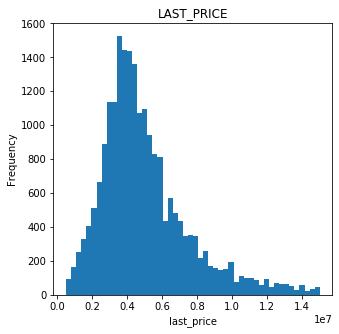

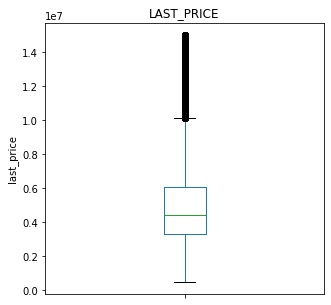

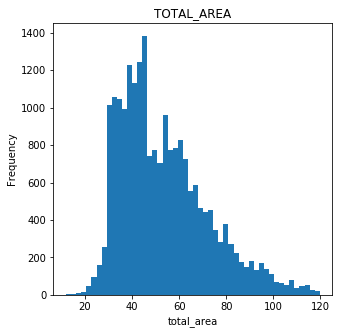

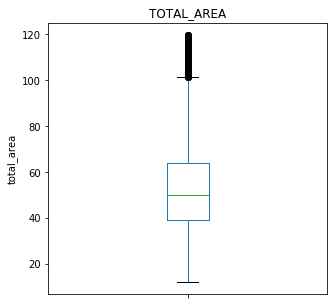

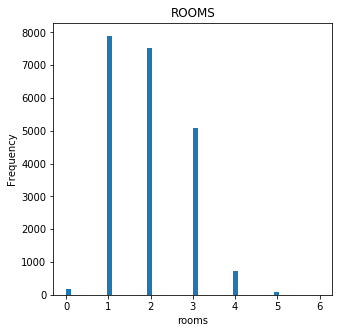

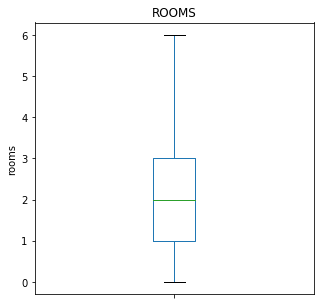

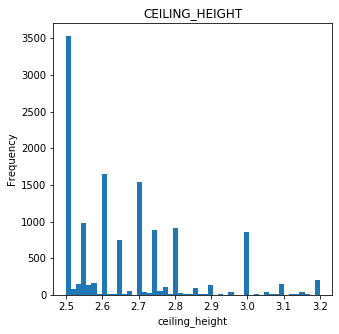

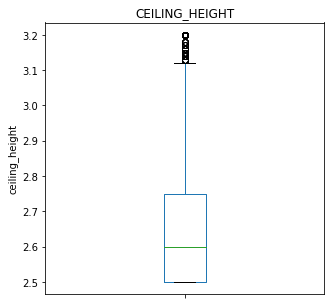

In [ ]:
research_cols4 = ['last_price', 'total_area', 'rooms', 'ceiling_height'] # строим графики с помощью цикла
                  
for col in research_cols4:
    df_normalized[col].plot(kind = 'hist', y = col, title = col.upper(), bins = 50, figsize = (5, 5))
    plt.xlabel(col)
    plt.show()
    df_normalized[col].plot(kind = 'box', y = col, title = col.upper(), figsize = (5, 5), label = '')
    plt.ylabel(col)
    plt.show()   

После фильтрации данных и устранения явных выбросов, распределение больше напоминает распределение Пуассона, а выбросов очень мало.

Медиана цены ~ 4,5 миллионов рублей, а общей площади ~ 50 м². Больше всего однокомнатных квартир, а медиана - 2 комнаты. Медиана высоты потолков составляет ~ 2,6 м.

Подтвердим эти данные с помощью цифр, применив метод `describe`:

In [ ]:
df_normalized.describe() # применение метода describe

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,citycenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,square_meter_price,year_exposition,living_to_total_area,kitchen_to_total_area
count,21510.000000,2.151000e+04,21510.000000,21510.000000,12893.000000,21510.000000,21510.000000,21510.000000,21510.000000,21510.000000,...,16118.000000,16119.000000,6677.000000,16119.000000,7717.000000,18868.000000,21510.000000,21510.000000,21510.000000,21510.000000
mean,9.744212,4.996049e+06,53.500026,1.931241,2.666625,10.935565,30.654620,5.963877,9.672873,0.604928,...,14983.700211,0.549600,494.954021,0.706682,532.560321,173.245336,93336.339149,2017.385495,0.565547,0.191159
std,5.566995,2.531387e+06,18.747236,0.896144,0.172998,6.659595,13.262868,4.937335,3.931399,0.953585,...,8400.067303,0.755182,338.374058,0.890910,276.709577,211.628027,30879.268595,1.022811,0.109867,0.070378
min,0.000000,5.000000e+05,12.000000,0.000000,2.500000,1.000000,2.000000,1.000000,1.300000,0.000000,...,329.000000,0.000000,1.000000,0.000000,13.000000,1.000000,9615.384615,2014.000000,0.038462,0.043524
25%,6.000000,3.328000e+06,39.000000,1.000000,2.500000,5.000000,18.000000,2.000000,7.000000,0.000000,...,10667.000000,0.000000,293.000000,0.000000,317.000000,44.000000,75006.472957,2017.000000,0.492312,0.139535
50%,9.000000,4.450000e+06,49.940000,2.000000,2.600000,9.000000,29.700000,4.000000,9.000000,0.000000,...,13619.500000,0.000000,458.000000,0.000000,520.000000,91.000000,93333.333333,2017.000000,0.566667,0.177778
75%,14.000000,6.050000e+06,64.000000,3.000000,2.750000,16.000000,39.700000,8.000000,11.000000,1.000000,...,16670.000000,1.000000,618.000000,1.000000,742.000000,219.000000,110780.542986,2018.000000,0.637732,0.234043
max,50.000000,1.500000e+07,119.800000,6.000000,3.200000,60.000000,130.983636,33.000000,64.000000,5.000000,...,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,387096.774194,2019.000000,1.594839,0.787879


In [ ]:
len(df_normalized) / len(df) * 100 # изучение количества строк в отфильтрованной таблице

91.09388895947149

Отфильтрованная таблица имеет 91% строк по сравнению с исходной таблицей после предобработки. Мы считаем, что этих данных достаточно для проведения качественного исследования.

### Поиск закономерностей

#### Поиск закономерностей зависимости цены от параметров для квартир во всех населенных пунктах 

Для начала построим матрицу рассеяния по количественным параметрам. Для нахождения корреляции цены с общей площадью, высотой потолков, временем размещения объявления и количеством комнат лучше использовать параметр "цена".

'-------------------------------------------МАТРИЦА РАССЕЯНИЯ-------------------------------------------'

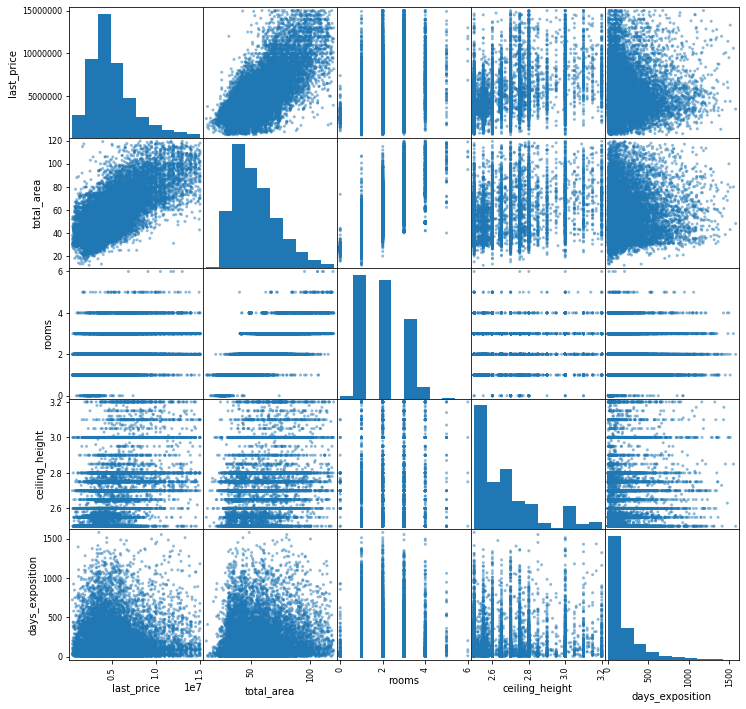

In [ ]:
# матрица рассеяния
display('-------------------------------------------МАТРИЦА РАССЕЯНИЯ-------------------------------------------')
pd.plotting.scatter_matrix(df_normalized[['last_price', 'total_area', 'rooms', 'ceiling_height', 'days_exposition']], figsize=(12, 12))
plt.show()

Мы видим, что есть положительная корреляция между ценой и общей площадью, что логично, и общей площадью и количеством комнат, что также ожидаемо.

Подтвердим эти данные с помощью цифр - построим матрицу корреляции:

In [ ]:
df_normalized[['last_price', 'total_area', 'rooms', 'ceiling_height', 'days_exposition']].corr() # марица корреляции

,last_price,total_area,rooms,ceiling_height,days_exposition
last_price,1.000000,0.722952,0.441363,0.456391,0.083738
total_area,0.722952,1.000000,0.799217,0.336393,0.114696
rooms,0.441363,0.799217,1.000000,0.074980,0.082825
ceiling_height,0.456391,0.336393,0.074980,1.000000,0.081808
days_exposition,0.083738,0.114696,0.082825,0.081808,1.000000


Корреляция между ценой и площадью, а также площадью и количеством комнат достаточно сильная (коэффициент Пирсона 0,7 и 0,8 соответственно).

Расстояние квартиры от центра и другие параметры целесообразно сравнивать не с ценой квартиры, а с ценой квадратного метра.

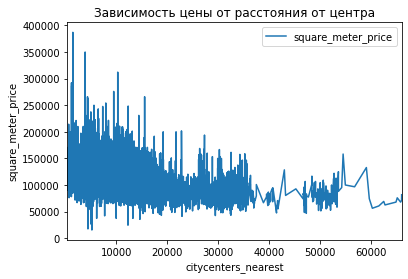

In [ ]:
# график распределения цены за квадратный метр в зависимости от расстояния от центра
df_normalized.sort_values(by = 'citycenters_nearest').plot(x = 'citycenters_nearest', y ='square_meter_price', title = 'Зависимость цены от расстояния от центра')
plt.ylabel('square_meter_price', fontsize=10)
plt.show()

In [ ]:
df_normalized['citycenters_nearest'].corr(df['square_meter_price']) # рассчет коэффициента Пирсона 

-0.4017296650587175

Есть небольшая отрицательная корреляция, однако связь слишком слабая, чтобы делать однозначные выводы. По графику можно сделать вывод, что с увеличением расстояния от центра уменьшается разброс значений цены за квадратный метр. Это значит, что на цену квартир в центре влияет больше факторов, чем на окраине.  

Для установления связи между качественными и количественными признаками расчет коэффициента Пирсона не подходит.  
Качественные параметры мы будем оценивать с помощью графиков.

Построим график зависимости цены квадратного метра от этажа квартиры:

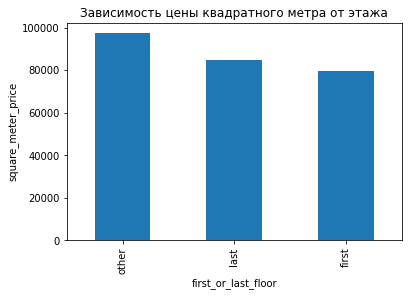

In [ ]:
# график распределения цены за квадратный метр в зависимости от этажа
(df_normalized.groupby('first_or_last_floor')['square_meter_price'].mean().sort_values(ascending = False)
.plot(x = 'first_or_last_floor', y ='square_meter_price', kind = 'bar',  title = 'Зависимость цены квадратного метра от этажа'))
plt.ylabel('square_meter_price')
plt.show()

Квартиры на первом и последнем этаже стоят дешевле, чем на других этажах.

Построим график зависимости цены квадратного метра от года размещения объявления:

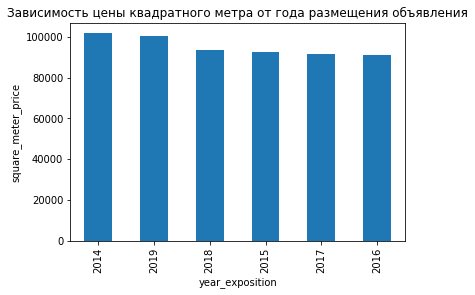

In [ ]:
# график распределения цены за квадратный метр в зависимости от года размещения объявления
(df_normalized.groupby('year_exposition')['square_meter_price'].mean().sort_values(ascending = False)
.plot(x = 'year_exposition', y ='square_meter_price', kind = 'bar', title = 'Зависимость цены квадратного метра от года размещения объявления'))
plt.ylabel('square_meter_price')
plt.show()

После 2014 года отмечается резкое снижение цены квадратного метра. Такое падение цены связано с введением санкций против РФ со стороны США и их союзников, чо послужило причиной снижения платежеспособности населения. Затем с 2015 по 2019 гг. отмечается постепенный рост цены, но она не достигла уровня 2014 года.

Построим график зависимости цены квадратного метра от месяца размещения объявления:

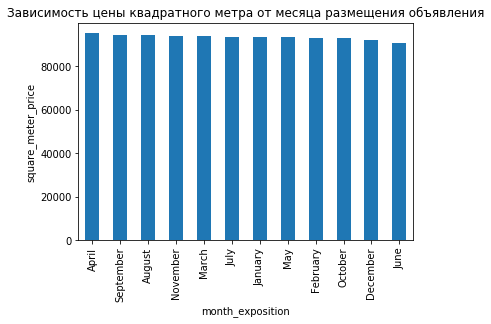

In [ ]:
# график распределения цены за квадратный метр в зависимости от месяца размещения объявления
(df_normalized.groupby('month_exposition')['square_meter_price'].mean().sort_values(ascending = False)
.plot(x = 'month_exposition', y ='square_meter_price', kind = 'bar', title = 'Зависимость цены квадратного метра от месяца размещения объявления'))
plt.ylabel('square_meter_price')
plt.show()

График показывает, что цена не зависит от месяца размещения объявления.

Построим график зависимости цены квадратного метра от дня недели размещения объявления:

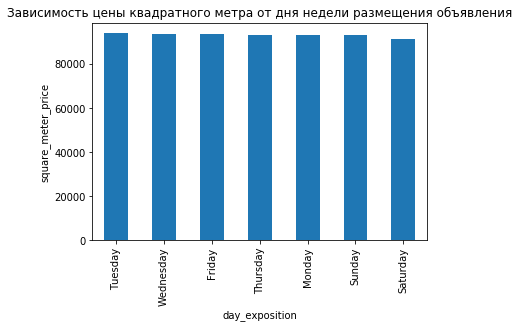

In [ ]:
# график распределения цены за квадратный метр в зависимости от дня недели размещения объявления
(df_normalized.groupby('day_exposition')['square_meter_price'].mean().sort_values(ascending = False)
.plot(x = 'day_exposition', y ='square_meter_price', kind = 'bar', title = 'Зависимость цены квадратного метра от дня недели размещения объявления'))
plt.ylabel('square_meter_price')
plt.show()

График показывает, что цена не зависит от дня недели размещения объявления.

Теперь выясним, в каких населенных пунктах больше всего объявлений о продажах квартир:

In [ ]:
top_locations = df_normalized['locality_name'].value_counts().head(10) # подсчет количества объявлений в населенных пунктах
top_locations

санкт-петербург      13750
поселок мурино         550
поселок шушары         437
всеволожск             390
пушкин                 334
колпино                333
поселок парголово      325
гатчина                301
деревня кудрово        299
выборг                 222
Name: locality_name, dtype: int64

Бесспорным лидером по количеству объявлений является Санкт-Петербург.

Посчитаем среднюю цену квадратного метра в этих населённых пунктах и выведем результат на гарфике:

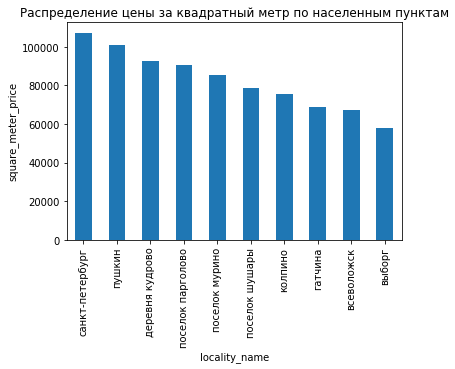

In [ ]:
# график распределения цены за квадратный метр по населенным пунктам
(df_normalized.query('locality_name in @top_locations.index')
.groupby('locality_name')['square_meter_price'].mean().sort_values(ascending = False)
.plot(x = 'locality_name', y ='square_meter_price', kind = 'bar', title = 'Распределение цены за квадратный метр по населенным пунктам'))
plt.ylabel('square_meter_price')
plt.show()

По средней цене квадратного метра также лидирует Санкт-Петербург, а самая низкая цена квадратного метра в Выборге.

**Вывод**

Изучив данные по всем населенным пунктам, мы выявили следующее:  

1. Между ценой и общей площадью квартиры, а также общей площадью и количеством комнат имеется достаточно сильная прямая корреляция (коэффициент Пирсона 0,7 и 0,8 соответственно);
2. С увеличением расстояния от центра уменьшается разброс значений цены за квадратный метр, что означает, что на цену квартир в центре влияет больше факторов, чем на окраине;  
3. Квартиры на первом и последнем этаже стоят дешевле, чем на других этажах;  
4. После 2014 года отмечается резкое снижение цены квадратного метра с последующим постепенныв ростом, что связано с экономическим кризисом на фоне санкций со стороны США и их союзников;  
5. Цена квадратного метра не зависит от месяца и дня недели размещения объявления;
6. Санкт-Петербург является бесспорным лидером по количеству объявлений и цене за квадратный метр.

#### Поиск закономерностей зависимости цены от параметров для квартир в Санкт-Петербурге

Выясним, отличается ли картина в Санкт-Петербурге и, в частности, его центральной части от общей. 

Создадим таблицу с данными только по Санкт-Петербургу с помощью логической фильтрации:

In [ ]:
# создание таблицы с данными только по Санкт-Петербургу
df_normalized_spb = df_normalized.query('locality_name == "санкт-петербург" and citycenters_nearest.isna() == False')

Создадим новую колонку с данными с расстоянием от центра в километрах:

In [ ]:
# создание новой колонки
df_normalized_spb['citycenters_nearest_km'] = round((df_normalized_spb['citycenters_nearest'] / 1000)).astype('int')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Проверим результат создания новой колонки:

In [ ]:
df_normalized_spb[['citycenters_nearest', 'citycenters_nearest_km']].head()

,citycenters_nearest,citycenters_nearest_km
0,16028.0,16
2,13933.0,14
4,8098.0,8
7,11634.0,12
9,15008.0,15


Построим график распределения цены квартиры в зависимости от удаленности от центра:

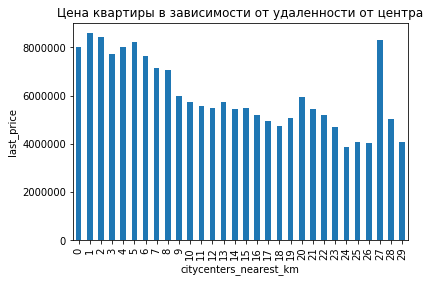

In [ ]:
# график распределения цены квартиры в зависимости от удаленности от центра
(df_normalized_spb.groupby('citycenters_nearest_km')['last_price'].mean()
.plot(x = 'citycenters_nearest_km', y ='last_price', kind = 'bar', title = 'Цена квартиры в зависимости от удаленности от центра'))
plt.ylabel('last_price')
plt.show()

Для более точного определения границ центра города подсчет средней цены жилья в зависимости от удаленности от центра имеет смыс с учетом элитного жилья, так как обычного жилья в центре относительно мало.

Для этого создадим таблицу с данными только по Санкт-Петербургу, но с учетом элитного жилья с помощью логической фильтрации и добавим в нее новую колонку с данными с расстоянием от центра в километрах:

In [ ]:
# создание таблицы с данными только по Санкт-Петербургу с учетом элитного жилья
df_spb = df.query('locality_name == "санкт-петербург" and citycenters_nearest.isna() == False')

In [ ]:
df_spb['citycenters_nearest_km'] = round((df_spb['citycenters_nearest'] / 1000)).astype('int') # создание новой колонки

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Построим график распределения цены квартиры в зависимости от удаленности от центра с учетом элитного жилья:

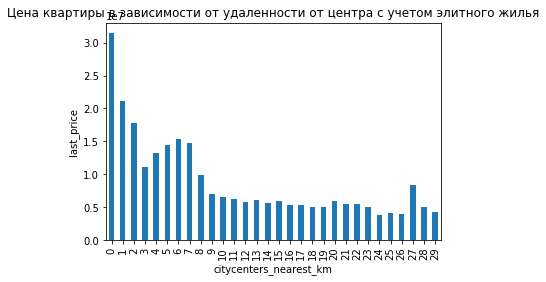

In [ ]:
# график распределения цены квартиры в зависимости от удаленности от центра с учетом элитного жилья
(df_spb.groupby('citycenters_nearest_km')['last_price'].mean()
.plot(x = 'citycenters_nearest_km', y ='last_price', kind = 'bar', title = 'Цена квартиры в зависимости от удаленности от центра с учетом элитного жилья'))
plt.ylabel('last_price')
plt.show()

На графике мы видим, что резкое снижение цены происходит после 7 километра от центра, таким образом, центральной частью города мы можем считать зону с радиусом 7 км от центра.

Создадим новую таблицу с данными только по центральной части Санкт-Петербурга:

In [ ]:
# создание таблицы с данными только по центральной части Санкт-Петербурга
df_normalized_spb_center = df_normalized_spb.query('citycenters_nearest_km <= 7')

Изучим параметры отдельно для Санкт-Петербурга и его центральной части. Сравним результаты с результатами анализа по всем населенным пунктам. Построим гистограммы и графики размаха для каждого параметра:

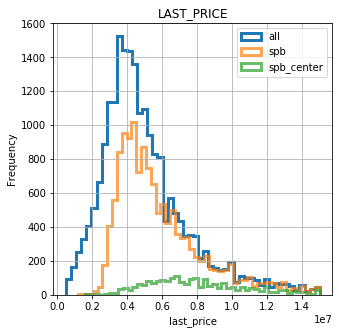

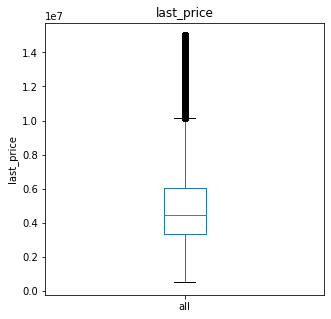

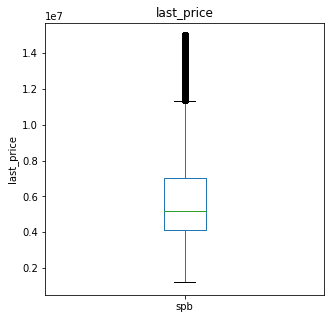

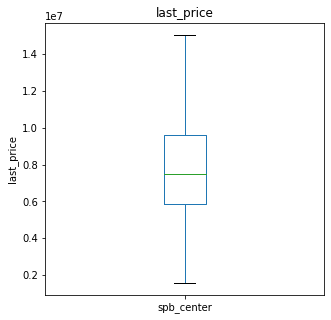

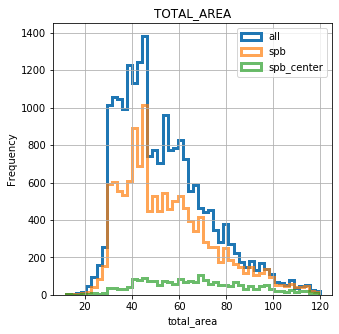

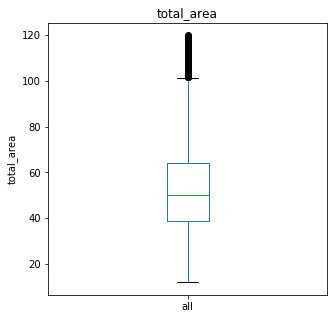

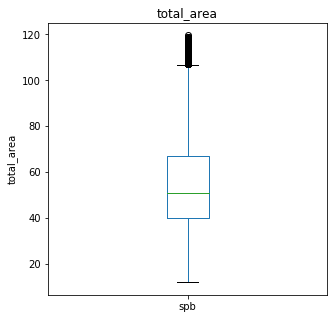

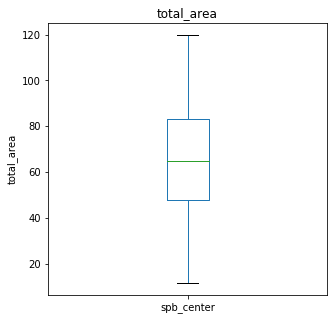

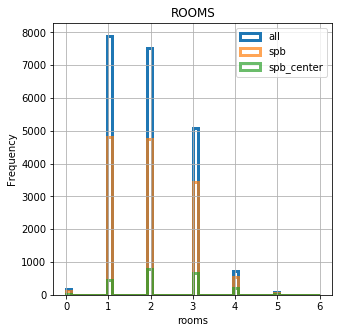

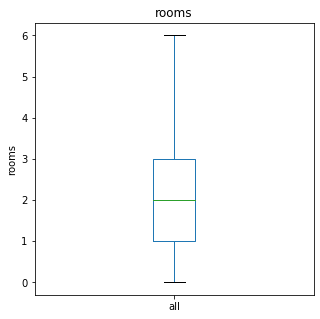

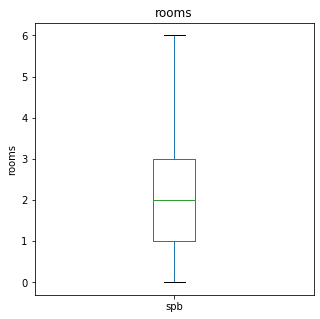

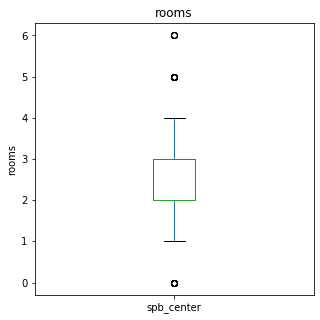

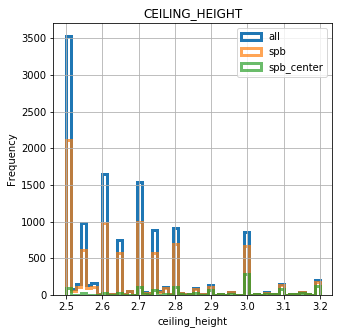

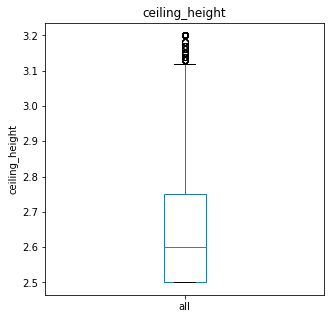

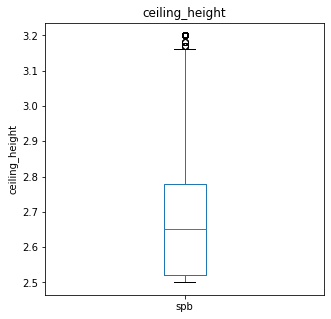

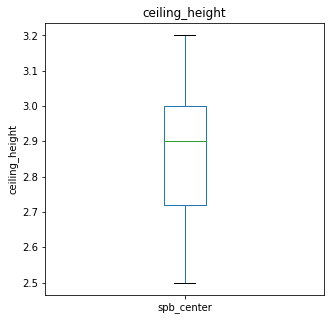

In [ ]:
research_cols5 = ['last_price', 'total_area', 'rooms', 'ceiling_height'] # строим графики с помощью цикла
                  
for col in research_cols5:
    ax = df_normalized[col].plot(kind = 'hist', y = col, title = col.upper(), bins = 50, figsize = (5, 5), histtype = 'step', linewidth = 3, label = 'all', legend = True, grid = True)
    df_normalized_spb[col].plot(kind = 'hist', y = col, title = col.upper(), bins = 50, figsize = (5, 5), histtype = 'step', linewidth = 3, ax = ax, alpha = 0.7, label = 'spb', legend = True, grid = True)
    df_normalized_spb_center[col].plot(kind = 'hist', y = col, title = col.upper(), bins = 50, figsize = (5, 5), histtype = 'step', linewidth = 3, ax = ax, alpha = 0.7, label = 'spb_center', legend = True, grid = True)
    plt.xlabel(col)
    plt.show()
    df_normalized[col].plot(kind = 'box', y = col, title = col, figsize = (5, 5), label = 'all')
    plt.ylabel(col)
    plt.show()
    df_normalized_spb[col].plot(kind = 'box', y = col, title = col, figsize = (5, 5), label = 'spb')
    plt.ylabel(col)
    plt.show()
    plt.ylabel(col)
    df_normalized_spb_center[col].plot(kind = 'box', y = col, title = col, figsize = (5, 5), label = 'spb_center')
    plt.show()

Результаты по **Санкт-Петербургу** и их сравнение с данными по всем населенным пунктам: Медиана цены ~ 5 миллионов рублей, что на пол миллиона рублей больше, а общей площади такая же: ~ 50 м². Больше всего однокомнатных квартир, но разница между количеством однокомнатных и двухкомнатных квартир меньше. Медиана количества комнат такая же - 2 комнаты. Медиана высоты потолков составляет ~ 2,65 м (практически такая же).   
Результаты по **центру Санкт-Петербурга** и их сравнение с данными по всем населенным пунктам: Медиана цены ~ 7,4 миллионов рублей (на 64% больше), а общей площади ~ 62 м² (на 24% больше). Больше всего двухкомнатных квартир, а длоля трехкомнатных квартир увеличилась, но медиана по прежнему 2 комнаты. Также обращает на себя внимание то, что квартир с количеством комнат больше 4 и меньше 1 (квартиры-студии) в центре города значительно меньше. Медиана высоты потолков составляет ~ 2,9 м, что, наиболее вероятно, связано с большим количеством старых домов (первой половины XX века и более ранних).

Подтвердим эти данные с помощью цифр, применив метод `describe`:

In [ ]:
df_normalized.describe() # применение метода describe к таблице с данными по всем населенным пунктам

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,citycenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,square_meter_price,year_exposition,living_to_total_area,kitchen_to_total_area
count,21510.000000,2.151000e+04,21510.000000,21510.000000,12893.000000,21510.000000,21510.000000,21510.000000,21510.000000,21510.000000,...,16118.000000,16119.000000,6677.000000,16119.000000,7717.000000,18868.000000,21510.000000,21510.000000,21510.000000,21510.000000
mean,9.744212,4.996049e+06,53.500026,1.931241,2.666625,10.935565,30.654620,5.963877,9.672873,0.604928,...,14983.700211,0.549600,494.954021,0.706682,532.560321,173.245336,93336.339149,2017.385495,0.565547,0.191159
std,5.566995,2.531387e+06,18.747236,0.896144,0.172998,6.659595,13.262868,4.937335,3.931399,0.953585,...,8400.067303,0.755182,338.374058,0.890910,276.709577,211.628027,30879.268595,1.022811,0.109867,0.070378
min,0.000000,5.000000e+05,12.000000,0.000000,2.500000,1.000000,2.000000,1.000000,1.300000,0.000000,...,329.000000,0.000000,1.000000,0.000000,13.000000,1.000000,9615.384615,2014.000000,0.038462,0.043524
25%,6.000000,3.328000e+06,39.000000,1.000000,2.500000,5.000000,18.000000,2.000000,7.000000,0.000000,...,10667.000000,0.000000,293.000000,0.000000,317.000000,44.000000,75006.472957,2017.000000,0.492312,0.139535
50%,9.000000,4.450000e+06,49.940000,2.000000,2.600000,9.000000,29.700000,4.000000,9.000000,0.000000,...,13619.500000,0.000000,458.000000,0.000000,520.000000,91.000000,93333.333333,2017.000000,0.566667,0.177778
75%,14.000000,6.050000e+06,64.000000,3.000000,2.750000,16.000000,39.700000,8.000000,11.000000,1.000000,...,16670.000000,1.000000,618.000000,1.000000,742.000000,219.000000,110780.542986,2018.000000,0.637732,0.234043
max,50.000000,1.500000e+07,119.800000,6.000000,3.200000,60.000000,130.983636,33.000000,64.000000,5.000000,...,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,387096.774194,2019.000000,1.594839,0.787879


In [ ]:
df_normalized_spb.describe() # применение метода describe к таблице с данными по Санкт-Петербургу

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,square_meter_price,year_exposition,living_to_total_area,kitchen_to_total_area,citycenters_nearest_km
count,13710.000000,1.371000e+04,13710.000000,13710.000000,8630.000000,13710.000000,13710.000000,13710.000000,13710.000000,13710.000000,...,13710.000000,5945.000000,13710.000000,6656.000000,12147.000000,13710.000000,13710.000000,13710.000000,13710.000000,13710.000000
mean,10.041357,5.886911e+06,55.234123,1.978483,2.685014,11.820350,31.590111,6.367834,9.940565,0.603501,...,0.560759,503.616484,0.700000,536.815204,171.836832,107215.658069,2017.372648,0.564566,0.190088,12.308972
std,5.599435,2.504891e+06,19.547954,0.911611,0.182263,6.392507,13.721996,4.960270,4.100496,0.962899,...,0.734749,340.805721,0.870451,279.436952,213.793818,24920.471542,1.035413,0.108775,0.070006,4.478649
min,0.000000,1.190000e+06,12.000000,0.000000,2.500000,1.000000,2.000000,1.000000,1.300000,0.000000,...,0.000000,1.000000,0.000000,13.000000,1.000000,15345.268542,2014.000000,0.038462,0.043524,0.000000
25%,6.000000,4.100000e+06,40.200000,1.000000,2.520000,6.000000,18.600000,3.000000,7.000000,0.000000,...,0.000000,304.000000,0.000000,318.750000,40.000000,90277.777778,2017.000000,0.495894,0.139138,10.000000
50%,10.000000,5.199000e+06,51.000000,2.000000,2.650000,10.000000,30.000000,5.000000,9.000000,0.000000,...,0.000000,468.000000,0.000000,524.000000,90.000000,102900.462697,2017.000000,0.566093,0.177066,13.000000
75%,14.000000,7.000000e+06,66.897500,3.000000,2.780000,16.000000,40.800000,9.000000,11.400000,1.000000,...,1.000000,624.000000,1.000000,755.000000,214.500000,120000.000000,2018.000000,0.637166,0.232558,15.000000
max,50.000000,1.500000e+07,119.600000,6.000000,3.200000,52.000000,130.983636,33.000000,64.000000,5.000000,...,3.000000,3190.000000,3.000000,1337.000000,1553.000000,387096.774194,2019.000000,1.492675,0.787879,29.000000


In [ ]:
df_normalized_spb_center.describe() # применение метода describe к таблице с данными по центральной части Санкт-Петебурга

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,square_meter_price,year_exposition,living_to_total_area,kitchen_to_total_area,citycenters_nearest_km
count,2156.000000,2.156000e+03,2156.000000,2156.000000,1239.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,...,2156.000000,1351.000000,2156.000000,1568.000000,1903.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000
mean,9.614100,7.910735e+06,66.416874,2.309369,2.887070,7.354824,38.612530,4.169295,11.492486,0.316790,...,0.916048,484.985936,1.259740,483.953444,224.614819,122918.787726,2017.192950,0.572651,0.184161,4.701763
std,5.599757,2.764435e+06,22.123483,0.977390,0.207087,4.072405,16.656018,2.939862,5.012047,0.723049,...,0.880256,338.649572,1.063755,265.818834,258.727858,33031.641986,1.086456,0.119954,0.080610,1.605564
min,0.000000,1.600000e+06,12.000000,0.000000,2.500000,2.000000,2.000000,1.000000,2.000000,0.000000,...,0.000000,9.000000,0.000000,22.000000,3.000000,15345.268542,2014.000000,0.038462,0.054348,0.000000
25%,5.000000,5.850000e+06,48.000000,2.000000,2.720000,5.000000,26.200000,2.000000,8.200000,0.000000,...,0.000000,285.000000,0.000000,255.500000,55.000000,99303.638866,2017.000000,0.501980,0.130727,4.000000
50%,9.000000,7.500000e+06,65.000000,2.000000,2.900000,6.000000,36.000000,4.000000,10.193571,0.000000,...,1.000000,433.000000,1.000000,472.000000,119.000000,118054.541768,2017.000000,0.585714,0.162204,5.000000
75%,14.000000,9.600000e+06,83.000000,3.000000,3.000000,9.000000,49.125000,5.000000,13.300000,0.000000,...,1.000000,606.000000,2.000000,672.250000,303.500000,141417.985280,2018.000000,0.652894,0.217153,6.000000
max,32.000000,1.500000e+07,119.600000,6.000000,3.200000,25.000000,130.983636,23.000000,64.000000,5.000000,...,3.000000,2295.000000,3.000000,1199.000000,1497.000000,387096.774194,2019.000000,1.355572,0.785267,7.000000


Теперь построим матрицу корреляции для нахождения корреляции цены с общей площадью, высотой потолков, временем размещения объявления и количеством комнат:

In [ ]:
df_normalized[['last_price', 'total_area', 'rooms', 'ceiling_height', 'days_exposition']].corr() # марица корреляции для всех населенных пунктов

,last_price,total_area,rooms,ceiling_height,days_exposition
last_price,1.000000,0.722952,0.441363,0.456391,0.083738
total_area,0.722952,1.000000,0.799217,0.336393,0.114696
rooms,0.441363,0.799217,1.000000,0.074980,0.082825
ceiling_height,0.456391,0.336393,0.074980,1.000000,0.081808
days_exposition,0.083738,0.114696,0.082825,0.081808,1.000000


In [ ]:
df_normalized_spb[['last_price', 'total_area', 'rooms', 'ceiling_height', 'days_exposition']].corr() # марица корреляции для Санкт-Петербурга

,last_price,total_area,rooms,ceiling_height,days_exposition
last_price,1.000000,0.804497,0.500199,0.467437,0.127891
total_area,0.804497,1.000000,0.788978,0.359305,0.141245
rooms,0.500199,0.788978,1.000000,0.091170,0.089493
ceiling_height,0.467437,0.359305,0.091170,1.000000,0.122232
days_exposition,0.127891,0.141245,0.089493,0.122232,1.000000


In [ ]:
df_normalized_spb_center[['last_price', 'total_area', 'rooms', 'ceiling_height', 'days_exposition']].corr() # марица корреляции для центральной части Санкт-Петебурга

,last_price,total_area,rooms,ceiling_height,days_exposition
last_price,1.000000,0.693349,0.427537,0.204356,0.142397
total_area,0.693349,1.000000,0.791261,0.274236,0.152667
rooms,0.427537,0.791261,1.000000,0.217222,0.088312
ceiling_height,0.204356,0.274236,0.217222,1.000000,0.061252
days_exposition,0.142397,0.152667,0.088312,0.061252,1.000000


В Санкт-Петербурге и его центральной части корреляция между ценой и площадью, а также площадью и количеством комнат также сильна.

Проверим корреляцию между ценой квадратного метра и расстояние квартиры от центра:

In [ ]:
df_normalized['citycenters_nearest'].corr(df['square_meter_price']) # рассчет коэффициента Пирсона для всех населенных пунктов

-0.4017296650587175

In [ ]:
df_normalized_spb['citycenters_nearest'].corr(df['square_meter_price']) # рассчет коэффициента Пирсона для Санкт-Петербурга

-0.3210516835465699

In [ ]:
df_normalized_spb_center['citycenters_nearest'].corr(df['square_meter_price']) # рассчет коэффициента Пирсона для центральной части Санкт-Петебурга

0.04383327965863743

Корреляция между расстоянием от центра и ценой квадратного метра слабая, а в центральной части города еще более слабая.

Проверим зависимость цены квадратного метра от этажа квартиры:

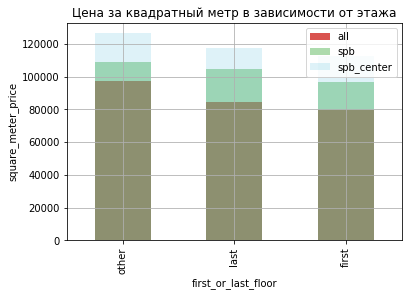

In [ ]:
# график распределения цены за квадратный метр в зависимости от этажа
ax = df_normalized.groupby('first_or_last_floor')['square_meter_price'].mean().sort_values(ascending = False).plot(x = 'first_or_last_floor', y ='square_meter_price', label = 'all', legend = True, grid = True, kind = 'bar', color='#d9534f', alpha = 1, title = 'Цена за квадратный метр в зависимости от этажа')
df_normalized_spb.groupby('first_or_last_floor')['square_meter_price'].mean().sort_values(ascending = False).plot(x = 'first_or_last_floor', y ='square_meter_price', ax = ax, label = 'spb', legend = True, grid = True, kind = 'bar', color='#5cb85c', alpha = 0.5)
df_normalized_spb_center.groupby('first_or_last_floor')['square_meter_price'].mean().sort_values(ascending = False).plot(x = 'first_or_last_floor', y ='square_meter_price', ax = ax, label = 'spb_center', legend = True, grid = True, kind = 'bar', color='#5bc0de', alpha = 0.2)
plt.ylabel('square_meter_price')
plt.show()

Квартиры на первом и последнем этаже стоят дешевле, чем на других этажах независимо от их географического расположения.

Построим график зависимости цены квадратного метра от года размещения объявления:

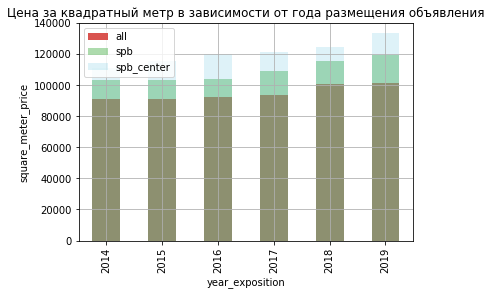

In [ ]:
# график распределения цены за квадратный метр в зависимости от года размещения объявления
ax = df_normalized.groupby('year_exposition')['square_meter_price'].mean().sort_values(ascending = True).plot(x = 'year_exposition', y ='square_meter_price', kind = 'bar', label = 'all', legend = True, grid = True, linewidth = 3, alpha = 1, color='#d9534f', title = 'Цена за квадратный метр в зависимости от года размещения объявления')
df_normalized_spb.groupby('year_exposition')['square_meter_price'].mean().sort_values(ascending = True).plot(x = 'year_exposition', y ='square_meter_price', kind = 'bar', ax = ax, label = 'spb', legend = True, grid = True, linewidth = 3, alpha = 0.5, color='#5cb85c')
df_normalized_spb_center.groupby('year_exposition')['square_meter_price'].mean().sort_values(ascending = True).plot(x = 'year_exposition', y ='square_meter_price', kind = 'bar', ax = ax, label = 'spb_center', legend = True, grid = True, linewidth = 3, alpha = 0.2, color='#5bc0de')
plt.ylabel('square_meter_price')
plt.show()

Отмечается постепенный рост цены за квадратный метр во всех сегментах.

Построим график зависимости цены квадратного метра от месяца размещения объявления:

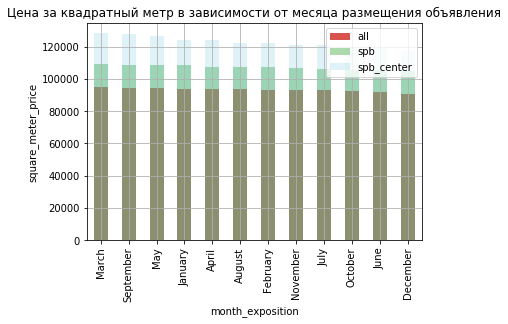

In [ ]:
# график распределения цены за квадратный метр в зависимости от месяца размещения объявления
ax = df_normalized.groupby('month_exposition')['square_meter_price'].mean().sort_values(ascending = False).plot(x = 'month_exposition', y ='square_meter_price', kind = 'bar', label = 'all', legend = True, grid = True, linewidth = 3, alpha = 1, color='#d9534f', title = 'Цена за квадратный метр в зависимости от месяца размещения объявления')
df_normalized_spb.groupby('month_exposition')['square_meter_price'].mean().sort_values(ascending = False).plot(x = 'month_exposition', y ='square_meter_price', kind = 'bar', ax = ax, label = 'spb', legend = True, grid = True, linewidth = 3, alpha = 0.5, color='#5cb85c')
df_normalized_spb_center.groupby('month_exposition')['square_meter_price'].mean().sort_values(ascending = False).plot(x = 'month_exposition', y ='square_meter_price', kind = 'bar', ax = ax, label = 'spb_center', legend = True, grid = True, linewidth = 3, alpha = 0.2, color='#5bc0de')
plt.ylabel('square_meter_price')
plt.show()

График показывает, что цена не зависит от месяца размещения объявления во всех сегментах.

Построим график зависимости цены квадратного метра от дня недели размещения объявления:

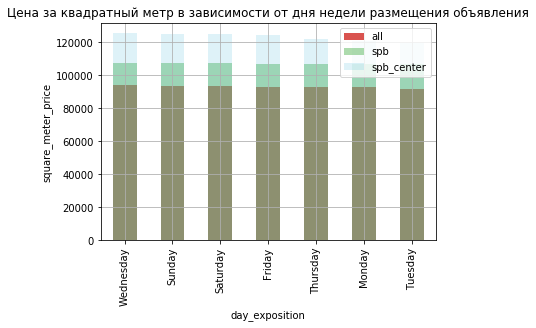

In [ ]:
# график распределения цены за квадратный метр в зависимости от дня недели размещения объявления
ax = df_normalized.groupby('day_exposition')['square_meter_price'].mean().sort_values(ascending = False).plot(x = 'day_exposition', y ='square_meter_price', kind = 'bar', label = 'all', legend = True, grid = True, linewidth = 3, alpha = 1, color='#d9534f', title = 'Цена за квадратный метр в зависимости от дня недели размещения объявления')
df_normalized_spb.groupby('day_exposition')['square_meter_price'].mean().sort_values(ascending = False).plot(x = 'day_exposition', y ='square_meter_price', kind = 'bar', ax = ax, label = 'spb', legend = True, grid = True, linewidth = 3, alpha = 0.5, color='#5cb85c')
df_normalized_spb_center.groupby('day_exposition')['square_meter_price'].mean().sort_values(ascending = False).plot(x = 'day_exposition', y ='square_meter_price', kind = 'bar', ax = ax, label = 'spb_center', legend = True, grid = True, linewidth = 3, alpha = 0.2, color='#5bc0de')
plt.ylabel('square_meter_price')
plt.show()

График показывает, что цена не зависит от дня недели размещения объявления во всех сегментах.

**Вывод**

Параметры по Санкт-Петербургу практически не отличаются от параметров по всем населенным пунктам.   
В центральной части Санкт-Петербурга медиана цены больше на 64%, медиана общей площади больше на 24%, преобладают двухкомнатные квартиры, увеличилась доля трехкомнатных квартир, значительно меньше квартир с количеством комнат больше 4 и меньше 1 (квартиры-студии), увеличилась медиана высоты потолков до 2,9 м.  
Влияние параметров квартир на их цену в Санкт-Петербурге и его центральной части не отличается от результатов исследования по всем населенным пунктам.

## Итоги исследования

Мы провели исследование и установили, как следующие параметры влияют на цену квартиры:

**1. Общая площадь.** Между ценой и общей площадью квартиры имеется сильная прямая корреляция (коэффициент Пирсона 0,7). Т.е. при одинаковой стоимости квадратного метра квартира большей площади, что логично, будет стоить дороже;

**2. Количество комнат.** Между ценой и количеством комнат корреляции нет, однако имеется сильная прямая корреляция между общей площадью и количеством комнат (коэффициент Пирсона 0,8). Т.е. квартиры с большей площадью, как правило, имеют больше комнат;

**3. Высота потолков.** Между ценой и высотой потолков корреляции нет;  

**4. Время продажи квартиры.** Между ценой и временем размещения объявления корреляции нет;   

**5. Этаж.** Квартиры на первом и последнем этаже стоят дешевле, чем на других этажах. Главным и наиболее очевидным минусом проживания на последнем этаже могут стать проблемы с кровлей, что по большей части касается старых домов, где отсутствует технический этаж. Еще один важный момент - отсутствие технического этажа становится причиной жары в летнее время и сильного холода зимой. Минусами проживания на первом этаже являются: большее беспокойство от соседей по подъезду и просто прохожих; как правило, отсутствие лоджии/балкона; пониженная безопасность проживания; 

**6. Расстояние от центра.** Между ценой и расстоянием от центра корреляции нет, однако, с увеличением расстояния от центра уменьшается разброс значений цены за квадратный метр, что означает, что на цену квартир в центре влияет больше факторов, чем на окраине;

**7. Год, месяц и день недели создания объявления о продаже.** После 2014 года отмечается резкое снижение цены квадратного метра с последующим постепенным ростом, что связано с экономическим кризисом на фоне санкций со стороны США и их союзников. Между ценой и месяцем, а также днем недели размещения объявления связи нет.

Для большинства изученных параметром установить связь с ценой не удалось. Это означает, что влияние на цену оказывает не каждый фактор по отдельности, а комбинация факторов, многие из которых не были учтены при сборе информации о продаваемых квартирах.  
Например, дополнительными факторами, которые влияют на цену могут являться: тип дома, год постройки, первичка или вторичка, качество ремонта, экологическая обстановка, срочность продажи, квартира продается с мебелью / без мебели, престижность района, наличие инфраструктуры и т.д.

Дополнительно мы установили, что: 

Санкт-Петербург является бесспорным лидером по количеству объявлений о продаже квартир и цене за квадратный метр.  
Параметры по Санкт-Петербургу практически не отличаются от параметров по всем населенным пунктам.  
В центральной части Санкт-Петербурга по сравнению с данными по всем населенным пунктам медиана цены больше на 64%, медиана общей площади больше на 24%, преобладают двухкомнатные квартиры, увеличилась доля трехкомнатных квартир, значительно меньше квартир с количеством комнат больше 4 и меньше 1 (квартиры-студии), увеличилась медиана высоты потолков до 2,9 м.  
Влияние параметров квартир на их цену в Санкт-Петербурге и его центральной части не отличается от результатов исследования по всем населенным пунктам.

**<span style="color:blue">Наши рекомендации:  
    1. Выделить элитное жилье в отдельный сегмент и анализировать его отдельно;  
    2. Установить следующие параметры для разделения обычного и элитного жилья: цена больше 15 миллионов, общая площадь от 120 м², количество комнат больше 6, высота потолков больше 3,2 м;  
    3. Установить следующие параметры для определения аномалий в данных: цена меньше 500 тысяч, общая площадь равная нолю, высота потолков меньше 2,5 м, время продажи квартир меньше 7 и больше 600 дней;  
    4. Собирать данные по дополнительными параметрам, которые влияют на цену, для дальнейшего анализа (тип дома, год постройки, первичка или вторичка, качество ремонта, экологическая обстановка, срочность продажи, квартира продается с мебелью / без мебели, престижность района, наличие инфраструктуры и т.д.);  
    5. Провести анализ влияния на цену не отдельных параметров, а разных комбинаций параметров (многомерный/многофакторный анализ).</span>**